# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [49]:
# Instalação de bibliotecas básicas
!pip install pandas matplotlib seaborn numpy
!pip install pandas
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as np
from PIL import Image
from io import BytesIO
from IPython.display import display, HTML

## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [9]:
print("Shape:", df.shape)
print("Tipos de dados:\n", df.dtypes)
print("Valores ausentes:\n", df.isnull().sum())
print("Estatísticas descritivas:\n", df.describe())

Shape: (1389, 30)
Tipos de dados:
 Unnamed: 0               int64
date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                     float64
pkatt                  float64
season                   int64
team                    object
weekday                 object
total_goals            float64
dtype: object
Valores ausentes:
 Un

## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

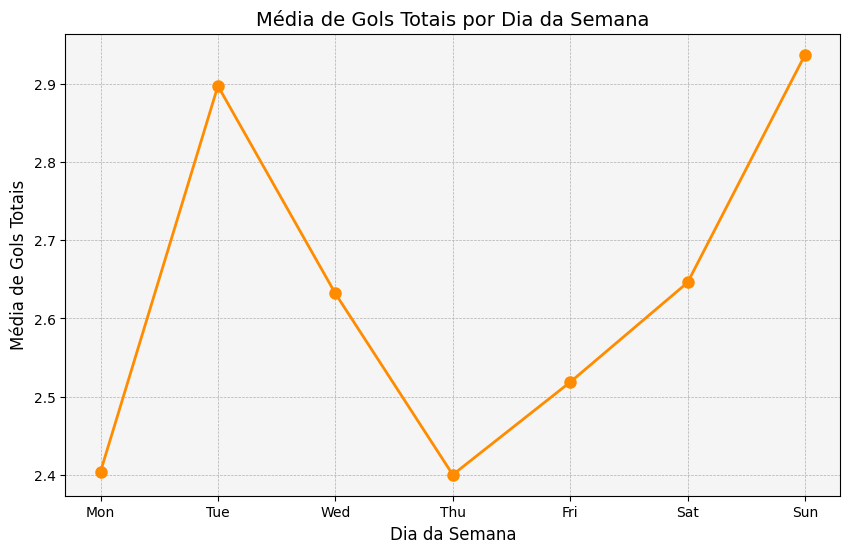

In [17]:
plt.figure(figsize=(10, 6))

# Plotando um gráfico de linha com marcadores para cada dia
plt.plot(avg_goals_per_day['day'], avg_goals_per_day['total_goals'],
         marker='o', color='darkorange', linestyle='-', linewidth=2, markersize=8)

# Adicionando rótulos e título
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Média de Gols Totais', fontsize=12)
plt.title('Média de Gols Totais por Dia da Semana', fontsize=14)

# Personalizando a grade e o fundo
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('whitesmoke')

# Exibindo o gráfico estilizado
plt.show()


## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

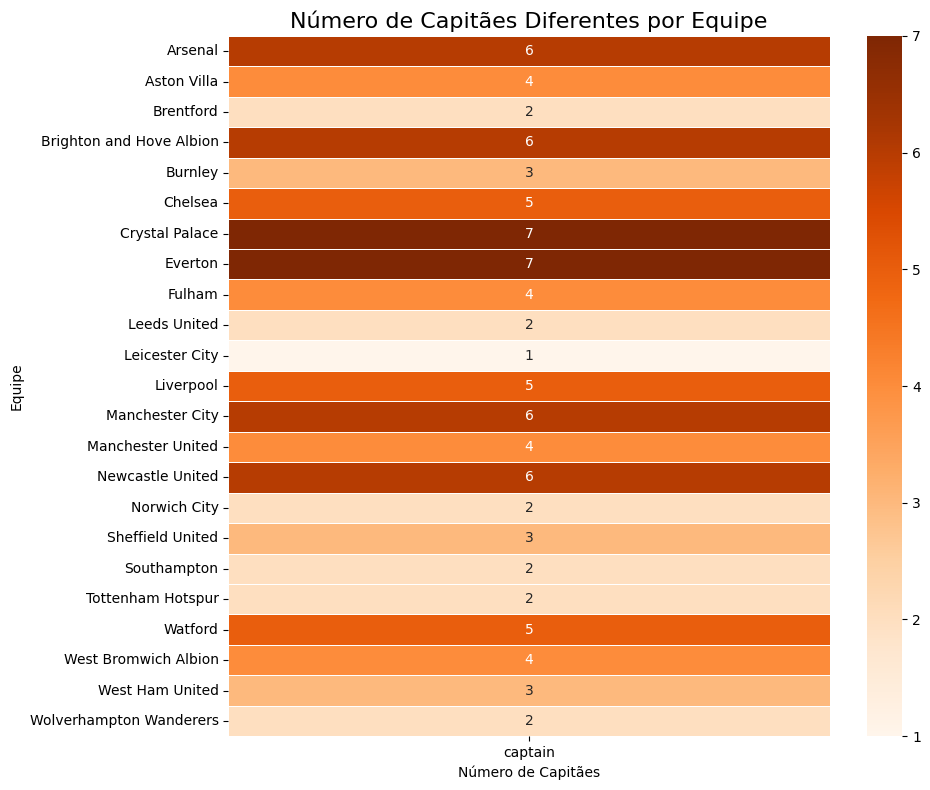

In [23]:
# Capitães por time
captains_per_team = df.groupby('team')['captain'].nunique().reset_index()

# Criar um heatmap para o número de capitães únicos por equipe
plt.figure(figsize=(10, 8))

# Reformatar os dados em um formato adequado para o heatmap
captains_heatmap_data = captains_per_team.pivot_table(index='team', values='captain')

# Criar o heatmap com anotações dos valores
sns.heatmap(captains_heatmap_data, annot=True, cmap='Oranges', cbar=True, linewidths=0.5)

# Adicionar títulos e rótulos
plt.title('Número de Capitães Diferentes por Equipe', fontsize=16)
plt.xlabel('Número de Capitães')
plt.ylabel('Equipe')

# Exibir o heatmap
plt.tight_layout()
plt.show()


## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

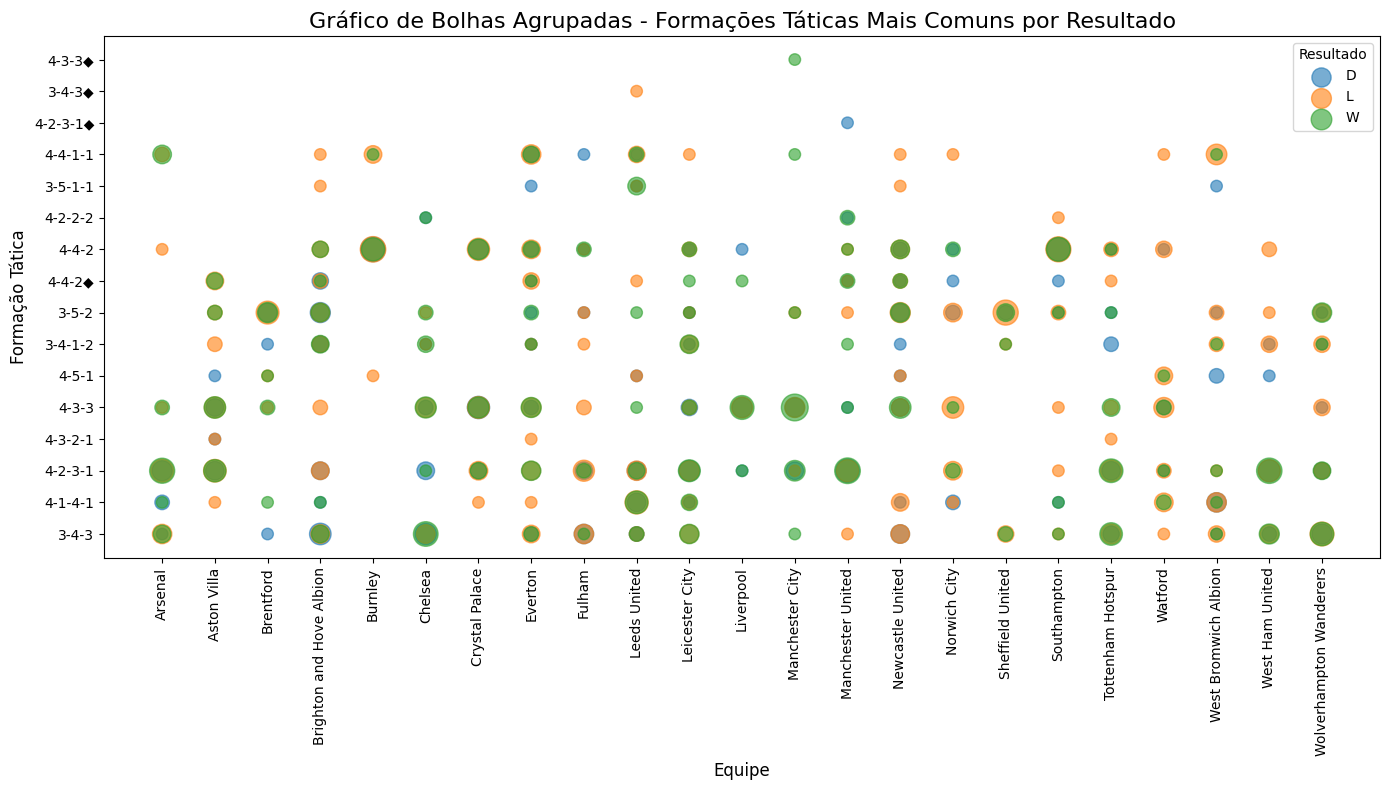

In [29]:
# Normalizar a frequência para o tamanho das bolhas
formation_frequency['bubble_size'] = np.log(formation_frequency['frequency'] + 1) * 100  # Escalar o tamanho das bolhas

# Criar um gráfico de bolhas agrupadas para cada resultado
plt.figure(figsize=(14, 8))

# Usar scatter plot para representar o gráfico de bolhas
for result in formation_frequency['result'].unique():
    subset = formation_frequency[formation_frequency['result'] == result]
    plt.scatter(subset['team'], subset['formation'], s=subset['bubble_size'], alpha=0.6, label=result)

# Adicionar rótulos e título
plt.title('Gráfico de Bolhas Agrupadas - Formaçōes Táticas Mais Comuns por Resultado', fontsize=16)
plt.xlabel('Equipe', fontsize=12)
plt.ylabel('Formação Tática', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Resultado')

# Exibir o gráfico
plt.tight_layout()
plt.show()


## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

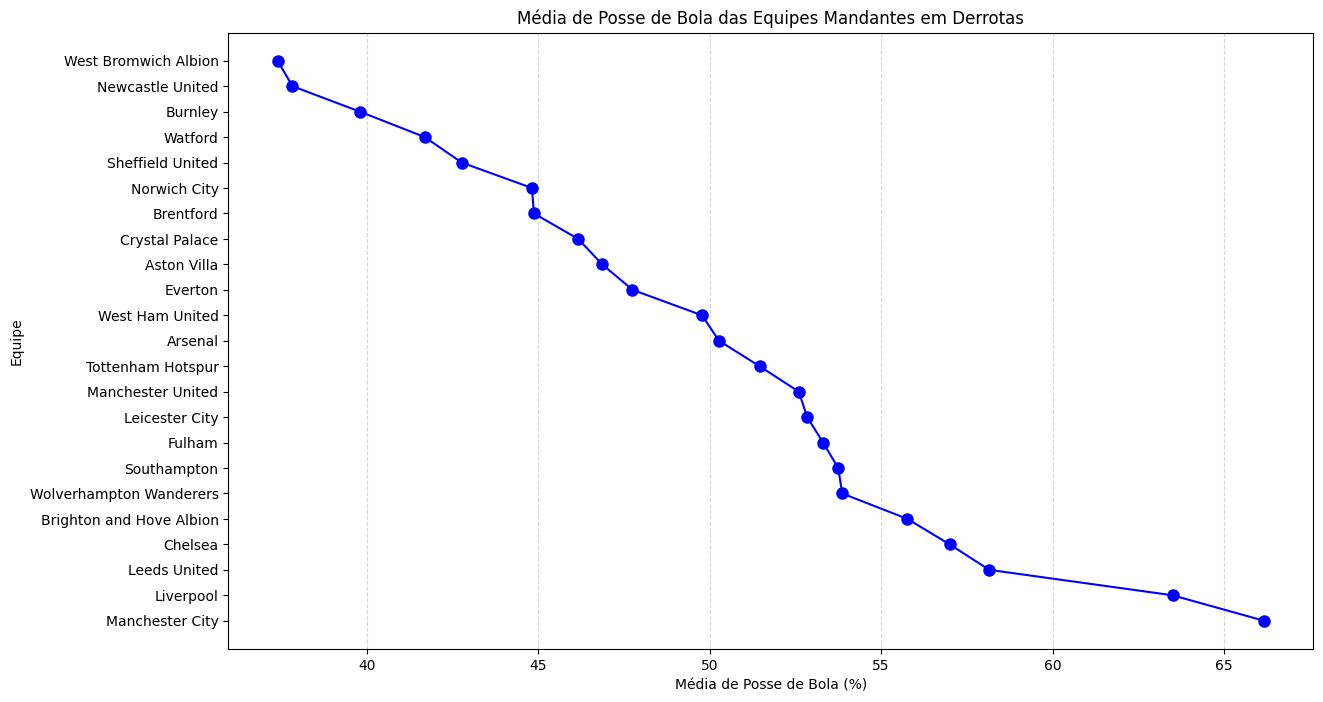

In [35]:
# Responda aqui a etapa

# Filtrar os dados para jogos onde a equipe era mandante e perdeu
home_loss = df[(df['venue'] == 'Home') & (df['result'] == 'L')]

# Calcular a média de posse de bola para cada equipe mandante que perdeu
possession_avg = home_loss.groupby('team')['poss'].mean().reset_index()

# Ordenar os dados para facilitar a visualização
possession_avg = possession_avg.sort_values(by='poss', ascending=False)

# Criar o gráfico de linha com pontos
plt.figure(figsize=(14, 8))
plt.plot(possession_avg['poss'], possession_avg['team'], marker='o', linestyle='-', color='b', markersize=8)
plt.title('Média de Posse de Bola das Equipes Mandantes em Derrotas')
plt.xlabel('Média de Posse de Bola (%)')
plt.ylabel('Equipe')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [55]:
import pandas as pd
from IPython.display import display

# Carregar os dados do CSV
df = pd.read_csv('/content/sample_data/matches.csv')

# Calcular pontos das equipes
df['points'] = df['result'].apply(lambda x: 3 if x == 'W' else 1 if x == 'D' else 0)

# Agrupar por equipe e calcular o total de pontos
team_points = df.groupby('team')['points'].sum().reset_index()

# Ordenar por pontos, do maior para o menor
team_points = team_points.sort_values(by='points', ascending=False).reset_index(drop=True)

# Adicionar a posição do time
team_points['position'] = team_points.index + 1

# URLs dos logotipos dos times
team_logos = {
    'Arsenal': 'https://logodetimes.com/times/arsenal-football-club/arsenal-football-club-256.png',
    'Aston Villa': 'https://logodetimes.com/times/aston-villa-football-club/aston-villa-football-club-256.png',
    'Brentford': 'https://logodetimes.com/times/brentford-football-club/brentford-football-club-256.png',
    'Brighton': 'https://logodetimes.com/times/brighton-hove-albion-football-club/brighton-hove-albion-football-club-256.png',
    'Burnley': 'https://logodetimes.com/times/burnley-football-club/burnley-football-club-256.png',
    'Chelsea': 'https://logodetimes.com/times/chelsea-football-club/chelsea-football-club-256.png',
    'Crystal Palace': 'https://logodetimes.com/times/crystal-palace-football-club/crystal-palace-football-club-256.png',
    'Everton': 'https://logodetimes.com/times/everton-football-club/everton-football-club-256.png',
    'Leeds United': 'https://logodetimes.com/times/leeds-united-football-club/leeds-united-football-club-256.png',
    'Leicester City': 'https://logodetimes.com/times/leicester-city-football-club/leicester-city-football-club-256.png',
    'Liverpool': 'https://logodetimes.com/times/liverpool-football-club/liverpool-football-club-256.png',
    'Manchester City': 'https://logodetimes.com/times/manchester-city-football-club/manchester-city-football-club-256.png',
    'Manchester United': 'https://logodetimes.com/times/manchester-united-football-club/manchester-united-football-club-256.png',
    'Newcastle United': 'https://logodetimes.com/times/newcastle-united-football-club/newcastle-united-football-club-256.png',
    'Norwich City': 'https://logodetimes.com/times/norwich-city-football-club/norwich-city-football-club-256.png',
    'Southampton': 'https://logodetimes.com/times/southampton-football-club/southampton-football-club-256.png',
    'Tottenham': 'https://logodetimes.com/times/tottenham-hotspur-football-club/tottenham-hotspur-football-club-256.png',
    'Watford': 'https://logodetimes.com/times/watford-football-club/watford-football-club-256.png',
    'West Ham': 'https://logodetimes.com/times/west-ham-united-football-club/west-ham-united-football-club-256.png',
    'Wolverhampton': 'https://logodetimes.com/times/wolverhampton-wanderers-football-club/wolverhampton-wanderers-football-club-256.png'
}

default_logo = 'https://logodetimes.com/wp-content/uploads/logo-placeholder.png'

# Função para obter o logotipo do time
def get_team_logo(team_name):
    return f'<img src="{team_logos.get(team_name, default_logo)}" width="50" height="50">'

# Adicionar a coluna de logotipo ao DataFrame
team_points['logo'] = team_points['team'].apply(get_team_logo)

# Renomear colunas para exibir em português
team_points = team_points.rename(columns={
    'logo': 'Logotipo',
    'team': 'Equipe',
    'points': 'Pontos',
    'position': 'Posição Final'
})

# Função para destacar o time com mais pontos
def highlight_top_team(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

# Função para filtrar times com base nos critérios fornecidos
def filter_teams(team_filter=None, position_filter=None):
    filtered_df = team_points.copy()

    if team_filter:
        filtered_df = filtered_df[filtered_df['Equipe'].str.contains(team_filter, case=False)]

    if position_filter:
        filtered_df = filtered_df[filtered_df['Posição Final'] == position_filter]

    filtered_df = filtered_df[['Logotipo', 'Equipe', 'Pontos', 'Posição Final']]

    # Aplicar estilo à tabela
    styled_table = filtered_df.style.apply(highlight_top_team, subset=['Pontos']).format({
        'Pontos': '{:.2f}'
    }).set_table_attributes('class="dataframe"').set_properties(**{
        'border': '1px solid black',
        'text-align': 'center'
    })

    return styled_table

# Definir filtros, se necessário
team_filter = None
position_filter = None

# Exibir a tabela filtrada
display(filter_teams(team_filter, position_filter))


,Logotipo,Equipe,Pontos,Posição Final
0,,Manchester City,166.00,1
1,,Chelsea,132.00,2
2,,Manchester United,128.00,3
3,,Arsenal,121.00,4
4,,Tottenham Hotspur,120.00,5
5,,West Ham United,117.00,6
6,,Leicester City,108.00,7
7,,Wolverhampton Wanderers,94.00,8
8,,Leeds United,93.00,9
9,,Aston Villa,92.00,10


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)

In [37]:
import pandas as pd
import plotly.graph_objects as go

# Remover linhas com valores ausentes na coluna de público
df = df.dropna(subset=['attendance'])

# Calcular o público total por equipe
team_attendance = df.groupby('team')['attendance'].sum().reset_index()
team_attendance = team_attendance.sort_values(by='attendance', ascending=False)

# Gráfico principal de pizza mostrando o público total por equipe
fig = go.Figure()

# Adicionar traço de pizza para o público total por equipe
fig.add_trace(go.Pie(
    labels=team_attendance['team'],
    values=team_attendance['attendance'],
    name='Público Total',
    hoverinfo='label+percent+value',
    textinfo='label+percent',
    marker=dict(colors=['royalblue', 'lightblue', 'cyan', 'darkblue', 'blue', 'skyblue']),
    pull=[0.05] * len(team_attendance)  # Puxar fatias para destacar
))

# Lista para controle de visibilidade dos traços
visibility = [[True] + [False] * len(team_attendance)]  # Visão Geral visível inicialmente

# Adicionar botões de DrillDown para detalhamento por equipe
buttons = []

# Loop para adicionar traços de detalhamento e configurar visibilidade
for i, team_name in enumerate(team_attendance['team']):
    # Filtrar jogos do time específico
    team_games = df[df['team'] == team_name]

    # Adicionar traço de pizza para detalhamento dos jogos do time
    trace = go.Pie(
        labels=team_games['date'],
        values=team_games['attendance'],
        name=f'Jogos do {team_name}',
        text=team_games['opponent'],
        hoverinfo='label+percent+value',
        textinfo='label+percent',
        marker=dict(colors=['orange', 'lightcoral', 'coral', 'darkorange']),
        visible=False  # Traço começa invisível
    )

    # Adicionar o traço ao gráfico
    fig.add_trace(trace)

    # Configurar visibilidade para o botão do time específico
    vis = [False] * (len(team_attendance) + 1)
    vis[i + 1] = True
    visibility.append(vis)

    # Adicionar botão para mostrar os jogos detalhados do time
    buttons.append(
        dict(
            label=team_name,
            method='update',
            args=[{'visible': vis},
                  {'title': f'Detalhamento de Público dos Jogos do {team_name}'}]
        )
    )

# Botão para retornar à visão geral
buttons.insert(0, dict(
    label="Visão Geral",
    method="update",
    args=[{"visible": visibility[0]},
          {"title": "Público Total por Equipe"}]
))

# Atualizar layout com botões
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction="down",
        showactive=True,
        x=0.17,
        xanchor="left",
        y=1.15,
        yanchor="top"
    )],
    title="Público Total por Equipe",
    template="plotly_white"
)

fig.show()

